In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import mkdir, listdir, getcwd, chdir
from scipy.stats import trim_mean as tm

chdir('/content/drive/My Drive/Imagenes Proyecto 3/')

In [0]:
'''HELPERS'''

def save_graph(name):
  if not (name in listdir()):
    plt.savefig(name, bbox_inches="tight")

def graph_p(hor_values, ver_values, g_type=0, 
          hor_label='', ver_label='', title='', 
          show_save=True, first=True, image=False):
  options = {0: plt.plot, 1: plt.bar}
  # Creación y configuración del gráfico:
  if first:
    fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
                    edgecolor='k')
    plt.tick_params(axis ='x', rotation = 60) 
  options[g_type](hor_values, ver_values, color ='tomato', linewidth=3)
  plt.xlabel(hor_label)
  plt.ylabel(ver_label)
  plt.title(title)
  if image:
    img = plt.imread("mapa-horizontal-completo.png")
    plt.imshow(img)
  # Se guarda el gráfico en el drive y se muestra:
  if show_save:
    save_graph(title.lower().replace(' ','_') + '.jpg')
    
    plt.close() 

def years_data():
  return population.loc[:,'a2002':]

north_south_array = np.array([[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
                              [2,3,4,5,6,8,9,10,11,13,14,15,7,12,1]])

north_south = pd.DataFrame(data=north_south_array,
                index= ['Numero_region', 'Orden_norte_sur'], 
                columns=range(15)).transpose()


In [0]:
executed_yet = False

##1. Leer una tabla de valores correspondientes a proyecciones de población de Chile. 

In [0]:
if not executed_yet:
  population = pd.read_csv('/content/drive/My Drive/Classroom/Machine Learning C3 - 2 GRU/Ricardo Andres Del Rio Guzman - base_final.csv')
  original_db = population #Respaldo para verificaciones
  display(population.head())
  display(population.tail())
display(population.iloc[2000,:])

,Unnamed: 0,Region,Nombre_region,Provincia,Nombre_provincia,Comuna,Nombre_comuna,Sexo,Edad,a2002,a2003,a2004,a2005,a2006,a2007,a2008,a2009,a2010,a2011,a2012,a2013,a2014,a2015,a2016,a2017,a2018,a2019,a2020
0,0,1,I Tarapacá,11,Iquique,1101,Iquique,1,0,NaN,NaN,1427.0,1455.0,1475.0,1484.0,NaN,1594.0,1595.0,1566.0,1561.0,1545.0,1538.0,1529.0,1511.0,1476.0,1442.0,NaN,1367.0
1,1,1,I Tarapacá,11,Iquique,1101,Iquique,1,1,1494.0,1466.0,1417.0,1422.0,1450.0,1470.0,1480.0,NaN,1587.0,1587.0,1559.0,1554.0,1534.0,1530.0,1520.0,NaN,1463.0,1430.0,1391.0
2,2,1,I Tarapacá,11,Iquique,1101,Iquique,1,2,1447.0,1419.0,1389.0,1341.0,NaN,1369.0,1387.0,1395.0,1427.0,1490.0,1492.0,1463.0,1456.0,NaN,1428.0,1416.0,1394.0,1362.0,1327.0
3,3,1,I Tarapacá,11,Iquique,1101,Iquique,1,3,1476.0,1446.0,1417.0,1386.0,1340.0,1344.0,1368.0,1386.0,NaN,NaN,1493.0,NaN,1466.0,1458.0,1438.0,1430.0,1420.0,1395.0,NaN
4,4,1,I Tarapacá,11,Iquique,1101,Iquique,1,4,1490.0,1463.0,1433.0,1404.0,1378.0,1331.0,1338.0,1363.0,1380.0,1390.0,1423.0,1487.0,1488.0,1459.0,1453.0,1433.0,1426.0,1415.0,1391.0


,Unnamed: 0,Region,Nombre_region,Provincia,Nombre_provincia,Comuna,Nombre_comuna,Sexo,Edad,a2002,a2003,a2004,a2005,a2006,a2007,a2008,a2009,a2010,a2011,a2012,a2013,a2014,a2015,a2016,a2017,a2018,a2019,a2020
56047,56047,15,XV Arica y Parinacota,152,Parinacota,15202,General Lagos,2,76,3.0,3.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
56048,56048,15,XV Arica y Parinacota,152,Parinacota,15202,General Lagos,2,77,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,NaN,4.0,4.0,4.0,4.0,4.0,4.0
56049,56049,15,XV Arica y Parinacota,152,Parinacota,15202,General Lagos,2,78,3.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,NaN
56050,56050,15,XV Arica y Parinacota,152,Parinacota,15202,General Lagos,2,79,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
56051,56051,15,XV Arica y Parinacota,152,Parinacota,15202,General Lagos,2,80,11.0,11.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,11.0,11.0,11.0,11.0,11.0,NaN,NaN,11.0,11.0,11.0


Unnamed: 0                     2000
Region                            2
Nombre_region       II  Antofagasta
Provincia                        22
Nombre_provincia             El Loa
Comuna                         2202
Nombre_comuna               Ollagüe
Sexo                              1
Edad                             56
a2002                             3
a2003                           NaN
a2004                             3
a2005                             3
a2006                           NaN
a2007                             4
a2008                           NaN
a2009                           NaN
a2010                             4
a2011                             4
a2012                             4
a2013                             5
a2014                           NaN
a2015                             5
a2016                             5
a2017                             5
a2018                             5
a2019                           NaN
a2020                       

##2. A continuación analice los datos y corrija los errores que encuentre:



###2.a.) Datos faltantes

Cree una función que determine las columnas que tienen valores faltantes NA. Usted puede determinar si una celda tiene un NA cuando df.iloc[i,j].isnull() es True. La función debe llamarse valores_na(df) y debe entregar una tabla con los nombres, cantidad de valores NA y porcentaje que representan del total de datos de la columna. Si los valores faltantes representan más del 25% de sus datos se debe eliminar la columna.

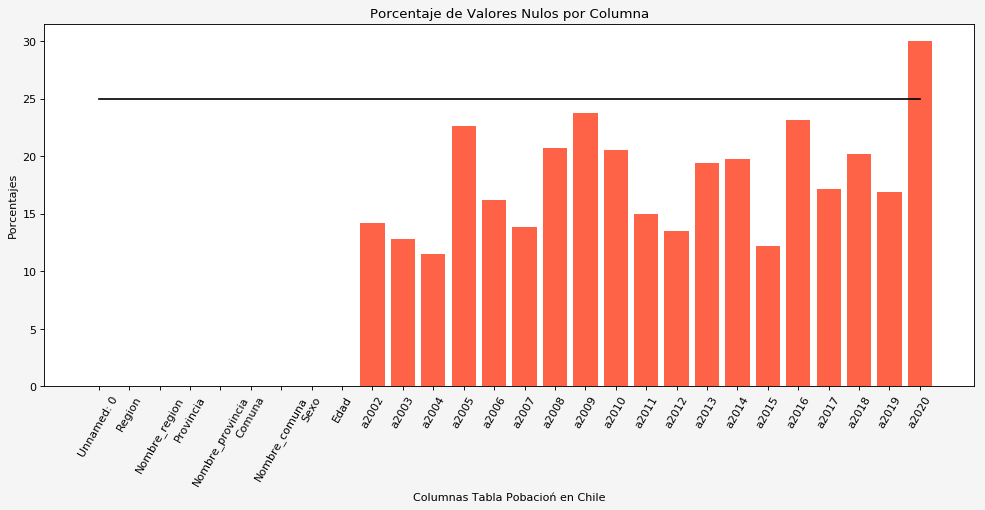

In [0]:
def valores_na(df):
  # Se crea un DataFrame vacío y se crean sus columnas con os datos:
  df_valna = pd.DataFrame()
  df_valna['values'] = df.columns
  df_valna.set_index('values',inplace=True)
  df_valna['total_count'] = [df.shape[0] for i in range(df.shape[1])]
  df_valna['nan_count'] = df.isna().sum()
  df_valna['percents'] = df_valna.nan_count * 100 / df_valna.total_count
  # Creación y configuración del gráfico:
  fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
                   edgecolor='k')
  plt.tick_params(axis ='x', rotation = 60) 
  plt.bar(df_valna.index.values, df_valna.iloc[:,2], color ='tomato')
  plt.plot(df_valna.index.values, np.full(len(df.iloc[0]), 25), c='black')
  plt.xlabel('Columnas Tabla Pobacioń en Chile')
  plt.ylabel('Porcentajes')
  plt.title('Porcentaje de Valores Nulos por Columna')
  # Se guarda el gráfico en el drive y se muestra:
  save_graph('porcentajes_valores_nulos.jpg')
  plt.show()
  plt.close()
  #  Se eliminan las columnas que tienen más de un 25% de valores vacíos:
  df.drop(df_valna[df_valna.percents > 25].index, 1, inplace=True)
  return df_valna
  
if not executed_yet:
  valores_na(population)

###2.b.) Reemplazar los valores faltantes por el cuantil 70 de la fila.

In [0]:
if not executed_yet:
  print('En la base de datos hay {} valores nulos.'.format(population.isna().sum().sum()))
  print('Procesando...')  
  # Se calcula el cuantil 70 de cada fila (considerando solo los años):
  quantile7 = population.loc[:,'a2002':].quantile(.7, axis=1)
  # Se reemplazan los Nan de cada fila con su quantil correspondiente:
  population.loc[:,'a2002':] = population.loc[:,'a2002':].transpose().fillna(quantile7).transpose()

print('En la base de datos hay {} valores nulos.'.format(population.isna().sum().sum()))


En la base de datos hay 175863 valores nulos.
Procesando...
En la base de datos hay 0 valores nulos.


###2.c.) Reemplazar los valores negativos por el cuantil 70 de la fila.

In [0]:
if not executed_yet:
  print('En la base de datos hay {} valores negativos.'.format(population.loc[:,'a2002':].lt(0).sum().sum()))
  print('Procesando...')

  # Todos los valores negativos se remplazan por Nan:
  neg_replaced = population.loc[:,'a2002':].where(population.loc[:,'a2002':].ge(0))
  # Se reemplazan los Nan por el cuantil 70 de la fila:
  population.loc[:,'a2002':] = neg_replaced.transpose().fillna(quantile7).transpose()

print('En la base de datos hay {} valores negativos.'.format(population.loc[:,'a2002':].lt(0).sum().sum()))

En la base de datos hay 10 valores negativos.
Procesando...
En la base de datos hay 0 valores negativos.


###2.d.) Búsqueda y reemplazo de "otliers".

Busque outliers en cada fila. Si encuentra alguno, reemplácelo por la media truncada de la fila (esto es la media de la región-provincia-comuna en los años 2002-2020). ¿Cómo encontrar un outlier? una forma de encontrar un outliers es buscar valores que sean mayores (o menores) que la media más (o menos) 3 veces la desviación estándar. Haga una función que realice un gráfico boxplot de cualquier columna y comente qué puede concluir de esto. En caso de ser necesario, luego del análisis, vuelva a graficar los boxplot según sus observaciones.  


In [0]:
# Cálculo de la media truncada:
trim_mean = tm(population.loc[:,'a2002':], 0.15, axis=1)
data_to_replace = np.repeat(np.c_[trim_mean, trim_mean], 9, axis=1)
# Cálculo de los límites:
upper_lim = population.loc[:,'a2002':].mean() + (3* population.loc[:,'a2002':]\
                                                 .std())
lower_lim = population.loc[:,'a2002':].mean() - (3* population.loc[:,'a2002':]\
                                                 .std())

# Se encuentran los otliers y se reemplazan por la media de los datos truncados:
without_ol = population.loc[:,'a2002':]\
.where(population.loc[:,'a2002':].gt(lower_lim), other=data_to_replace)\
.where(population.loc[:,'a2002':].lt(upper_lim), other=data_to_replace)
# Se concatenan las columnas hasta edad con los datos sin ouliers.
population = pd.concat([population.loc[:,:'Edad'], without_ol], axis=1)

population.head()


,Unnamed: 0,Region,Nombre_region,Provincia,Nombre_provincia,Comuna,Nombre_comuna,Sexo,Edad,a2002,a2003,a2004,a2005,a2006,a2007,a2008,a2009,a2010,a2011,a2012,a2013,a2014,a2015,a2016,a2017,a2018,a2019
0,0,1,I Tarapacá,11,Iquique,1101,Iquique,1,0,1546.6,1546.6,1427.0,1455.0,1475.0,1484.0,1546.6,1594.0,1595.0,1566.0,1561.0,1545.0,1538.0,1529.0,1511.0,1476.0,1442.0,1546.6
1,1,1,I Tarapacá,11,Iquique,1101,Iquique,1,1,1494.0,1466.0,1417.0,1422.0,1450.0,1470.0,1480.0,1532.0,1587.0,1587.0,1559.0,1554.0,1534.0,1530.0,1520.0,1532.0,1463.0,1430.0
2,2,1,I Tarapacá,11,Iquique,1101,Iquique,1,2,1447.0,1419.0,1389.0,1341.0,1437.5,1369.0,1387.0,1395.0,1427.0,1490.0,1492.0,1463.0,1456.0,1437.5,1428.0,1416.0,1394.0,1362.0
3,3,1,I Tarapacá,11,Iquique,1101,Iquique,1,3,1476.0,1446.0,1417.0,1386.0,1340.0,1344.0,1368.0,1386.0,1444.4,1444.4,1493.0,1444.4,1466.0,1458.0,1438.0,1430.0,1420.0,1395.0
4,4,1,I Tarapacá,11,Iquique,1101,Iquique,1,4,1490.0,1463.0,1433.0,1404.0,1378.0,1331.0,1338.0,1363.0,1380.0,1390.0,1423.0,1487.0,1488.0,1459.0,1453.0,1433.0,1426.0,1415.0


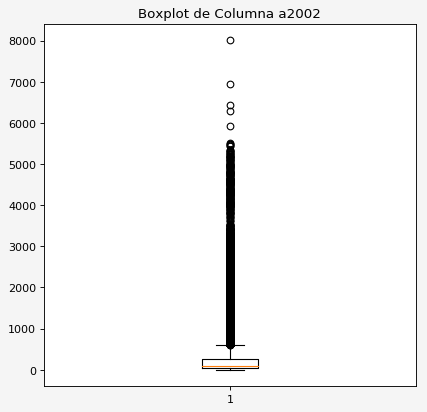

In [0]:
def boxplot_graph(column):
  fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='whitesmoke', 
                   edgecolor='k')
  plt.boxplot(population[column])
  plt.title('Boxplot de Columna ' + column)
  save_graph('Boxplot de Columna ' + column)
  plt.show()
  

boxplot_graph('a2002')

Análisis: En el gráfico se puede observar una enorme cantidad de otliers. Esto se produce porque al entregarle la información por columna está tomando la cantidad de población en comunas con tamaños muy diversos, ya que se encuentran a lo largo de todo Chile. Un gráfico boxplot tendría más sentido si se realiza por filas, de modo que solo mostrará los datos de un grupo etario de la misma comuna. Grupos de los cuales ya eliminamos los otliers en el paso anterior.

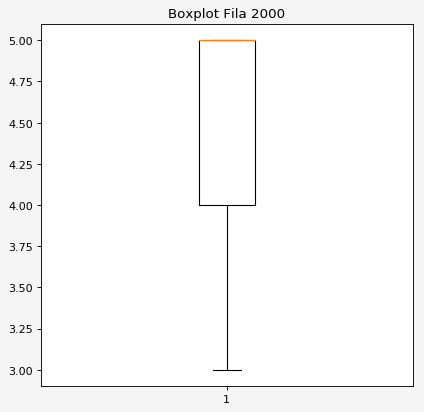

In [0]:
def boxplot_graph(row):
  fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='whitesmoke', 
                   edgecolor='k')
  plt.boxplot(population.loc[:,'a2002':].iloc[row,:])
  plt.title('Boxplot Fila '+ str(row))
  save_graph('Boxplot Fila '+ str(row))
  plt.show()

boxplot_graph(2000)

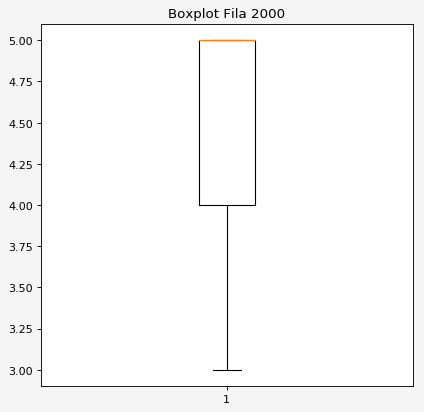

In [0]:
def boxplot_graph(row):
  fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='whitesmoke', 
                   edgecolor='k')
  plt.boxplot(population.loc[:,'a2002':].iloc[row,:])
  plt.title('Boxplot Fila '+ str(row))
  save_graph('Boxplot Fila '+ str(row))
  plt.show()

boxplot_graph(2000)

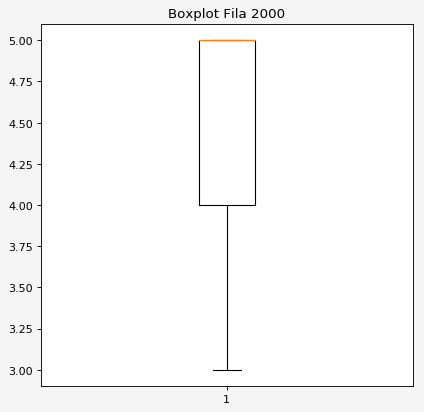

In [0]:
def boxplot_graph(row):
  fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='whitesmoke', 
                   edgecolor='k')
  plt.boxplot(population.loc[:,'a2002':].iloc[row,:])
  plt.title('Boxplot Fila '+ str(row))
  save_graph('Boxplot Fila '+ str(row))
  plt.show()

boxplot_graph(2000)

##3. Cree un nuevo DataFrame donde se calcule Índice de Masculinidad (IM), Índice de Adulto Mayor (IAM) , Índice de Dependencia Demográfica (IDD)

Cada uno de estos índices debe estar calculado por región. Luego, grafique dichos índices e identifique las 10 regiones que tienen los valores más altos en los indicadores. 


###3.a.) IM:	Índice de masculinidad, se refiere al número de hombres por cada 100 mujeres en una determinada zona demográfica.


Índice de masculinidad por región:


Region
1     107.064763
2     109.143773
3     105.732350
4      98.276275
5      96.632186
6     101.109495
7      99.232186
8      97.115891
9      97.856611
10    101.682647
11    109.409306
12    107.023470
13     95.694579
14    100.610686
15     99.968195
dtype: float64

"EXPLICACIÓN:\ngroupby() -> Agrupa los elementos del DataFrame en base a los elementos de  las \ncolumnas dadas\n\nEl primer sum() suma todas las cantidades de personas (por defecto también de \nedades, numero de comunas, ...) de una misma región, con el mismo sexo y\nen el mismo año.\n\nLuego se aplica un filto para eliminar los datos que no sean cantidades de \npersonas (edades, numeros de territorios...)\n\nEl segundo sum() suma todas las cantidades de personas (separadas por sexo)\na lo largo de los años (i.e: suma por filas)\n\nunstack('Sexo') ordena el DataFrame, para que el sexo de as personas pase a \nestar separado en columnas en vez de filas.\n"

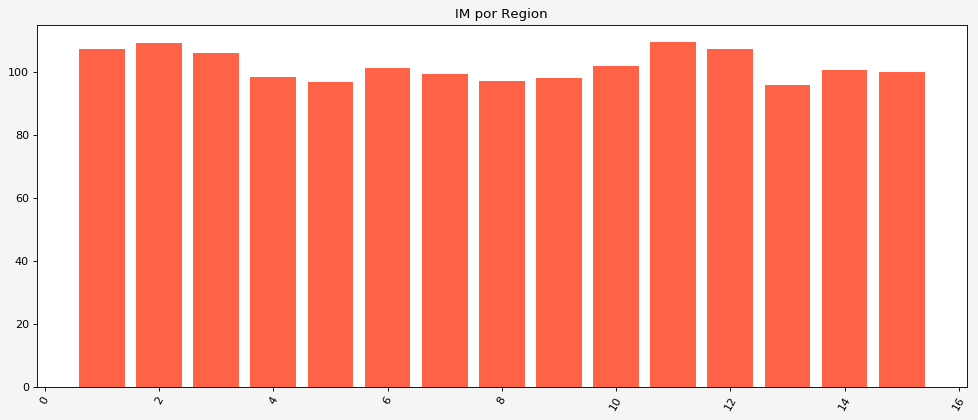

In [0]:
# Se agrupa y suma (de todos los años) la base de datos por Region y Sexo :
region_sex_grouped = population.groupby(['Region', 'Sexo']).sum().loc[:, 'a2002':].sum(axis=1).unstack('Sexo')
# Gráfico:
#region_sex_grouped.plot.bar(figsize=(15, 6))

# Se toma la columna de la cantidad de hombres por región a lo largo de todo el periodo:
men_per_region = region_sex_grouped.iloc[:,0]
# Se toma la columna de la cantidad de muejeres por región a lo largo de todo el periodo:
women_per_region = region_sex_grouped.iloc[:,1]
# Se calcula el índice de masculinidad por region:
im_per_region = (men_per_region * 100) / women_per_region

print('Índice de masculinidad por región:')
display(im_per_region)

graph_p(im_per_region.index,im_per_region, show_save=False, title='IM por Region',
        g_type=1)

'''EXPLICACIÓN:
groupby() -> Agrupa los elementos del DataFrame en base a los elementos de  las 
columnas dadas

El primer sum() suma todas las cantidades de personas (por defecto también de 
edades, numero de comunas, ...) de una misma región, con el mismo sexo y
en el mismo año.

Luego se aplica un filto para eliminar los datos que no sean cantidades de 
personas (edades, numeros de territorios...)

El segundo sum() suma todas las cantidades de personas (separadas por sexo)
a lo largo de los años (i.e: suma por filas)

unstack('Sexo') ordena el DataFrame, para que el sexo de as personas pase a 
estar separado en columnas en vez de filas.
'''

###3.b.) IAM: Índice de Adulto Mayor

In [0]:
region_age_grouped = population.groupby(['Region', 'Edad']).sum().loc[:, 'a2002':].sum(axis=1).unstack('Edad')

older60_per_region = region_age_grouped.iloc[:,61:].sum(axis=1)
younger15_per_region = region_age_grouped.iloc[:,:15].sum(axis=1)

iam_per_region = (older60_per_region * 100) / younger15_per_region

print('Índice de adulto mayor por region:')
display(iam_per_region)

Índice de adulto mayor por region:


Region
1     36.948400
2     40.321950
3     45.863621
4     57.252154
5     70.999801
6     57.877935
7     59.818951
8     59.472797
9     58.820274
10    52.524864
11    41.618303
12    59.245759
13    57.387245
14    60.550080
15    51.903231
dtype: float64

###3.c.) IDD: Índice de Dependencia Demográfica:

In [0]:
dependent_people_per_region = older60_per_region + younger15_per_region
independent_people_per_region = region_age_grouped.iloc[:,15:60].sum(axis=1)
idd_per_region = (dependent_people_per_region * 100) / independent_people_per_region

# print('Personas dependientes por region:')
# display(dependent_people_per_region)
print('\nÍndicE de Dependencia Demgráfica por region:')
display(idd_per_region)


ÍndicE de Dependencia Demgráfica por region:


Region
1     53.259970
2     51.179429
3     55.827554
4     56.950343
5     55.781571
6     55.653005
7     55.293868
8     54.196093
9     56.749108
10    55.714139
11    53.333653
12    51.697154
13    51.767316
14    55.388707
15    55.403756
dtype: float64

In [0]:
'''CREACIÓN DEL DATA FRAME'''

regions_names = population.loc[:,'Region':'Nombre_region'].groupby('Region').first()

regions_demography = pd.concat([regions_names, im_per_region, iam_per_region, idd_per_region], axis=1)
regions_demography.columns = ['Nombre', 'IM', 'IAM', 'IDD']
regions_demography

,Nombre,IM,IAM,IDD
Region,,,,
1,I Tarapacá,107.064763,36.948400,53.259970
2,II Antofagasta,109.143773,40.321950,51.179429
3,III Atacama,105.732350,45.863621,55.827554
4,IV Coquimbo,98.276275,57.252154,56.950343
5,V Valparaíso,96.632186,70.999801,55.781571
6,VI O'Higgins,101.109495,57.877935,55.653005
7,VII Maule,99.232186,59.818951,55.293868
8,VIII Biobío,97.115891,59.472797,54.196093
9,IX Araucanía,97.856611,58.820274,56.749108


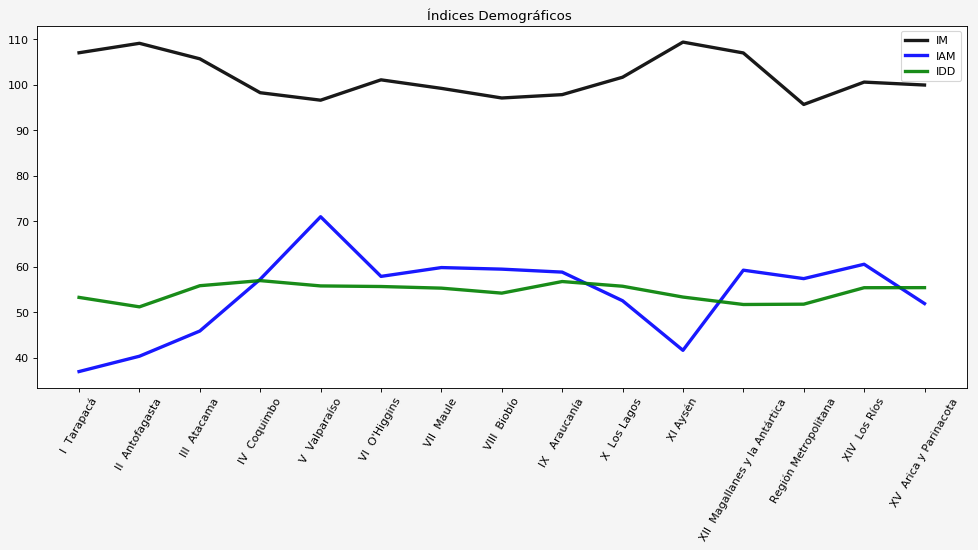

In [0]:
def graph(hor_values, ver_values, g_type=0, 
          show_save=True, color='black', label=''):
  options = {0: plt.plot, 1: plt.bar }
  # Creación y configuración del gráfico:
  options[g_type](hor_values, ver_values, color =color, linewidth=3, alpha=0.9, label=label)

fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
                    edgecolor='k')
plt.tick_params(axis ='x', rotation = 60)
num = 0
for column in ['IM', 'IAM', 'IDD']:
  colors = ['black', 'blue', 'green']
  graph(regions_demography.Nombre, regions_demography[column], g_type=0, label=column, color=colors[num])
  num += 1
plt.title('Índices Demográficos ')
plt.legend()
save_graph('Índices Demográficos.jpg')
plt.show()

##4. Haga una tabla que resuma el total de habitantes por región para cada año.


In [0]:
population_per_region = population.groupby(
    ['Region','Nombre_region']).sum().loc[:,'a2002':]
population_per_region['a2017'].sum()

18137647.6

##5. Haga una tabla que resuma el total de habitantes por región y por sexo.

In [0]:
## Si hay que sumar el total de todos los años:
# population.groupby(['Region','Nombre_region','Sexo']).sum().loc[:,'a2002':].sum(axis=1).unstack('Sexo')

## Si hay que mostrar el detalle año a año:
sex_region_population = population.groupby(['Region','Nombre_region','Sexo'])\
.sum().loc[:,'a2002':]
sex_region_population

a2002  ...         a2019
Region Nombre_region                  Sexo                ...              
1      I  Tarapacá                    1     1.338099e+05  ...  1.873613e+05
                                      2     1.237504e+05  ...  1.746521e+05
2      II  Antofagasta                1     2.803816e+05  ...  3.261002e+05
                                      2     2.586018e+05  ...  2.972728e+05
3      III  Atacama                   1     1.388454e+05  ...  1.686866e+05
                                      2     1.332195e+05  ...  1.558081e+05
4      IV  Coquimbo                   1     3.198543e+05  ...  3.960603e+05
                                      2     3.275410e+05  ...  4.034395e+05
5      V  Valparaíso                  1     8.012141e+05  ...  9.225506e+05
                                      2     8.266566e+05  ...  9.500660e+05
6      VI  O'Higgins                  1     4.129831e+05  ...  4.750136e+05
                                      2     4.055356e+05  ...  4.727238e+05
7      VII  Maule                     1     4.805241e+05  ...  5.299927e+05
                                      2     4.792151e+05  ...  5.397305e+05
8      VIII  Biobío                   1     9.677749e+05  ...  1.067181e+06
                                      2     9.951652e+05  ...  1.100042e+06
9      IX   Araucanía                 1     4.559869e+05  ...  4.950221e+05
                                      2     4.627269e+05  ...  5.084306e+05
10     X  Los Lagos                   1     3.819478e+05  ...  4.312135e+05
                                      2     3.756953e+05  ...  4.271821e+05
11     XI Aysén                       1     5.041600e+04  ...  5.775580e+04
                                      2     4.548770e+04  ...  5.392620e+04
12     XII  Magallanes y la Antártica 1     8.084230e+04  ...  8.673580e+04
                                      2     7.566520e+04  ...  8.184430e+04
13     Región Metropolitana           1     3.193889e+06  ...  3.627517e+06
                                      2     3.340554e+06  ...  3.769215e+06
14     XIV  Los Ríos                  1     1.883148e+05  ...  2.081177e+05
                                      2     1.877488e+05  ...  2.071214e+05
15     XV  Arica y Parinacota         1     1.005301e+05  ...  1.225959e+05
                                      2     1.010433e+05  ...  1.236924e+05

[30 rows x 18 columns]

##6. Encuentre las 10 comunas con el mayor IDD.

In [0]:
commune_age_grouped = population.groupby(['Comuna', 'Nombre_comuna', 'Edad'])\
.sum().loc[:, 'a2002':].sum(axis=1).unstack('Edad')

older60_per_commune = commune_age_grouped.iloc[:,61:].sum(axis=1)
younger15_per_commune = commune_age_grouped.iloc[:,:15].sum(axis=1)

dependent_people_per_commune = older60_per_commune + younger15_per_commune
independent_people_per_commune = commune_age_grouped.iloc[:,15:60].sum(axis=1)
idd_per_commune = (dependent_people_per_commune * 100) / independent_people_per_commune

idd_per_commune.columns = ['Comuna', 'Nombre', 'IDD']
print(type(idd_per_commune))

top_10 = idd_per_commune.sort_values().iloc[-10:]
graph_p(top_10.index.get_level_values(1), top_10.values, 1, show_save=True, title='Comunas con Mayor IDD')



<class 'pandas.core.series.Series'>


##7. Encuentre las 10 comunas con el mayor IM en la región metropolitana.

In [0]:
commune_sex_grouped = population[population.Region == 13]\
.groupby(['Comuna', 'Nombre_comuna', 'Sexo']).sum().loc[:, 'a2002':]\
.sum(axis=1).unstack('Sexo')

men_per_commune = commune_sex_grouped.iloc[:,0]
women_per_commune = commune_sex_grouped.iloc[:,1]
im_per_commune = (men_per_commune * 100) / women_per_commune
top_10 = im_per_commune.sort_values()[-10:]
graph_p(top_10.index.get_level_values(1), top_10.values, 1, show_save=True, title='IM Comunas Region Metropolitana')

##8. Encuentre las 10 comunas con el mayor IAM.

In [0]:
iam_per_commune = (older60_per_commune * 100) / younger15_per_commune
top_10 = iam_per_commune.sort_values()[-10:]
display(top_10)
graph_p(top_10.index.get_level_values(1), top_10.values, 1, show_save=True, title= 'Comunas con Mayor IAM')

Comuna  Nombre_comuna
13130   San Miguel       111.546186
5605    El Tabo          114.617504
13108   Inpendencia      129.210546
6205    Navidad          130.686605
13101   Santiago         134.697216
15201   Putre            138.089436
13120   Ñuñoa            145.013793
13123   Providencia      206.055763
12303   Timaukel         259.652174
12103   Río Verde        391.333900
dtype: float64

##9. Encuentre las 10 comunas que hayan tenido el menor crecimiento de población femenina entre los años 2002 y 2012.

In [0]:
femme_popu = population[(population.Sexo == 2)] 
fem_popu_com_grouped = femme_popu.groupby(['Comuna', 'Nombre_comuna']).sum().loc[:, 'a2002':'a2012']
commune_growth = fem_popu_com_grouped.loc[:,'a2012'] - fem_popu_com_grouped.loc[:,'a2002']
top_10 = commune_growth.sort_values().iloc[:10]
display(top_10)
graph_p(top_10.index.get_level_values(1), top_10.values, 1, show_save=True, title='Comunas con Menor Crecimiento de Población Femenina 2002-2012')

Comuna  Nombre_comuna       
8106    Lota                   -1366.8
10401   Chaitén                -1332.9
3202    Diego de Almagro       -1156.6
2302    María Elena             -840.6
10306   San Juan de la Costa    -609.7
10305   Río Negro               -549.2
9105    Freire                  -533.2
7201    Cauquenes               -522.7
8104    Florida                 -493.4
9116    Saavedra                -388.1
dtype: float64

##10. Usando la tabla hecha en (4) con las regiones ordenadas de Norte a Sur, grafique el número de habitantes por región para el año 2002, 2012 y 2018.


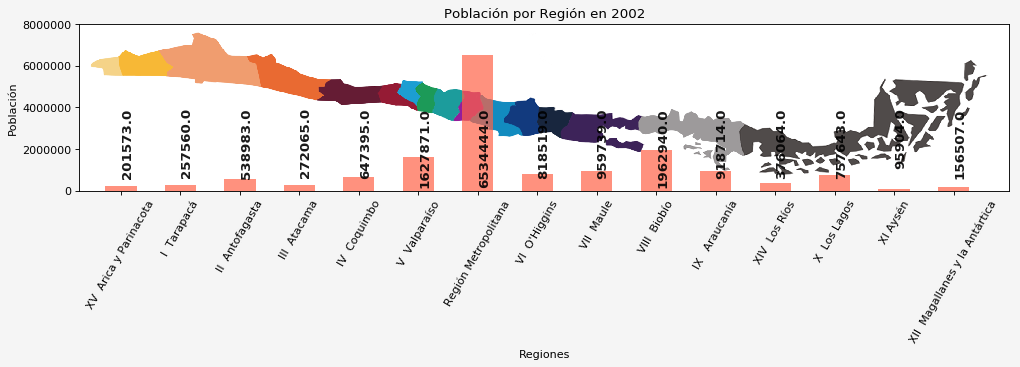

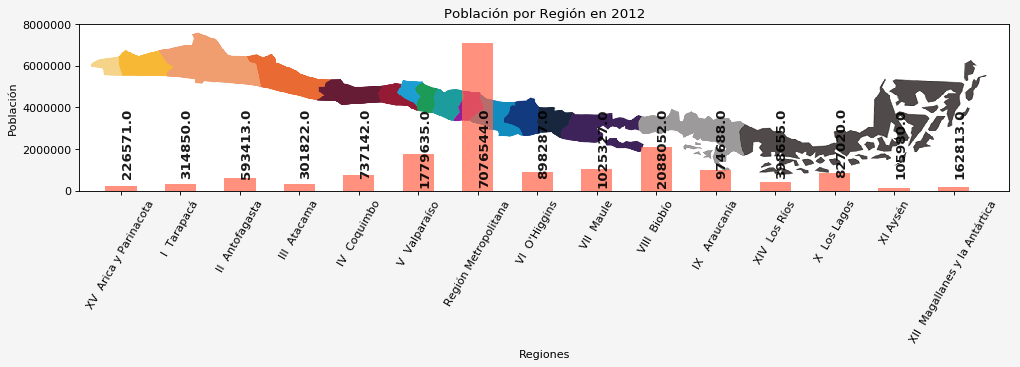

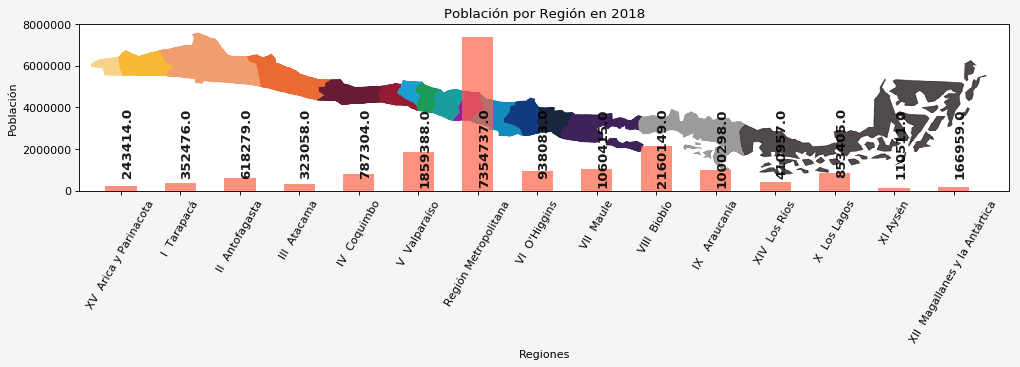

,Numero_region,Orden_norte_sur,Nombre_region,a2002,a2003,a2004,a2005,a2006,a2007,a2008,a2009,a2010,a2011,a2012,a2013,a2014,a2015,a2016,a2017,a2018,a2019
14,15,1,XV Arica y Parinacota,2.015733e+05,2.007924e+05,2.026477e+05,2.096868e+05,2.099885e+05,2.118512e+05,2.156655e+05,2.193103e+05,2.239654e+05,2.243726e+05,2.265705e+05,2.304218e+05,2.329338e+05,2.357719e+05,2.387157e+05,2.409748e+05,2.434138e+05,2.462882e+05
0,1,2,I Tarapacá,2.575603e+05,2.618423e+05,2.647801e+05,2.805875e+05,2.818894e+05,2.835970e+05,2.952048e+05,2.986913e+05,3.062937e+05,3.111995e+05,3.148505e+05,3.213426e+05,3.292609e+05,3.347506e+05,3.423712e+05,3.480332e+05,3.524756e+05,3.620135e+05
1,2,3,II Antofagasta,5.389834e+05,5.464442e+05,5.539331e+05,5.634439e+05,5.668834e+05,5.704224e+05,5.783830e+05,5.827906e+05,5.860262e+05,5.886476e+05,5.934125e+05,5.999073e+05,6.037158e+05,6.078826e+05,6.103197e+05,6.154690e+05,6.182792e+05,6.233730e+05
2,3,4,III Atacama,2.720649e+05,2.712979e+05,2.725904e+05,2.810684e+05,2.827050e+05,2.840023e+05,2.887897e+05,2.941877e+05,2.951199e+05,2.987476e+05,3.018217e+05,3.059125e+05,3.093679e+05,3.116405e+05,3.161662e+05,3.183124e+05,3.230581e+05,3.244947e+05
3,4,5,IV Coquimbo,6.473953e+05,6.533459e+05,6.573140e+05,6.821847e+05,6.798563e+05,6.893145e+05,7.050027e+05,7.156576e+05,7.212331e+05,7.282650e+05,7.371419e+05,7.479267e+05,7.557069e+05,7.646471e+05,7.708920e+05,7.811252e+05,7.873042e+05,7.994998e+05
4,5,6,V Valparaíso,1.627871e+06,1.638075e+06,1.651720e+06,1.694246e+06,1.697559e+06,1.707127e+06,1.731879e+06,1.746614e+06,1.757937e+06,1.766459e+06,1.779635e+06,1.796428e+06,1.808075e+06,1.820611e+06,1.833743e+06,1.848355e+06,1.859388e+06,1.872617e+06
12,13,7,Región Metropolitana,6.534444e+06,6.568295e+06,6.610673e+06,6.744791e+06,6.755640e+06,6.793808e+06,6.880132e+06,6.953470e+06,6.989943e+06,7.028344e+06,7.076544e+06,7.140924e+06,7.183781e+06,7.223954e+06,7.261341e+06,7.312962e+06,7.354737e+06,7.396732e+06
5,6,8,VI O'Higgins,8.185187e+05,8.275596e+05,8.337758e+05,8.549723e+05,8.540999e+05,8.601438e+05,8.739462e+05,8.846641e+05,8.897314e+05,8.918597e+05,8.982869e+05,9.069004e+05,9.142395e+05,9.202945e+05,9.279221e+05,9.359697e+05,9.380834e+05,9.477374e+05
6,7,9,VII Maule,9.597392e+05,9.664649e+05,9.691710e+05,9.914556e+05,9.894603e+05,9.936307e+05,1.007180e+06,1.014340e+06,1.020085e+06,1.021750e+06,1.025327e+06,1.034265e+06,1.040706e+06,1.043707e+06,1.052301e+06,1.058181e+06,1.060415e+06,1.069723e+06
7,8,10,VIII Biobío,1.962940e+06,1.977198e+06,1.988259e+06,2.023564e+06,2.022611e+06,2.025656e+06,2.052933e+06,2.066705e+06,2.072782e+06,2.075686e+06,2.088052e+06,2.104267e+06,2.114654e+06,2.118724e+06,2.136889e+06,2.145651e+06,2.160149e+06,2.167223e+06


In [0]:
# display(population_per_region.index.get_level_values(1))

# Sa agrega la columna con el orden de norte a sur y se ordena el DF en base
# a esa columna:
sorted_regions = north_south.merge(population_per_region\
                                   # Índices a columna:
                                   .reset_index(level=['Nombre_region']), 
                             left_on='Numero_region', right_on='Region'  )\
                             .sort_values('Orden_norte_sur')

def graph_country(hor_values, ver_values, g_type=0, 
                  title='', show_save=True, first=True):
  
  
  # Creación y configuración del gráfico:
  if first:
    fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
                    edgecolor='k')
    plt.tick_params(axis ='x', rotation = 60) 
  # Se entregan los datos a ser graficados:
  plt.bar(hor_values, ver_values, color ='tomato', linewidth=3, width=1500000 , 
          alpha=0.7, label=1234)
  # Textos del gráfico:
  plt.xlabel('Regiones')
  plt.ylabel('Población')
  plt.title(title)
  # Se ponen las etiquetas en el eje horizontal:
  plt.xticks(np.linspace(2000000,42000000,15),
             labels=sorted_regions.Nombre_region.values)
  
  
  # Se ponen los valores sobre las barras:
  for i in range(7):
    plt.text(x = hor_values[i] , y=[3500000 for i in range(15)][i] , 
             s = round(ver_values[i]), size = 12, rotation=90, color='black', 
             alpha=0.9, fontweight='bold')
  for i in range(7, 15):
    plt.text(x = hor_values[i] , y=[3500000 for i in range(15)][i] , 
            s = round(ver_values[i]), size = 12, rotation=90, color='black', 
            alpha=0.9, fontweight='bold')


  # Configuración de las imagenes de fondo:
  # Medidas originales de la imagen: (381, 1776, 4)
  img = plt.imread("mapa-horizontal-completo.png")
  plt.imshow(img, extent=[0, 44679245, 0, 8000000])

  
  # Se guarda el gráfico en el drive y se muestra:
  if show_save:
    save_graph(title.lower().replace(' ','_') + '.jpg')

  plt.show()
    
  plt.close() 



# Creación de los gráficos:
graph_country(np.linspace(2000000,42000000,15), sorted_regions.a2002.values, 
              show_save=True, g_type=1, title='Población por Región en 2002')
print()
graph_country(np.linspace(2000000,42000000,15), sorted_regions.a2012.values, 
              show_save=True, g_type=1, title='Población por Región en 2012')
print()
graph_country(np.linspace(2000000,42000000,15), sorted_regions.a2018.values, 
              show_save=True, g_type=1, title='Población por Región en 2018')

sorted_regions



##11. Usando la tabla hecha en (5) con las regiones ordenadas de Norte a Sur, grafique el número de habitantes por región para el año 2002, 2012 y 2018 usando el sexo como matiz.


In [0]:
if not executed_yet:
  sex_region_population.insert(0, 'Orden_norte_sur', [2,2,3,3,4,4,5,5,6,6,8,8,9,9,10,10,11,11,13,13,14,14,15,15,7,7,12, 12,1,1])
  sex_region_population.sort_values('Orden_norte_sur',inplace=True)
  sex_region_population.drop(columns=['Orden_norte_sur'], inplace=True)

men = sex_region_population.loc[pd.IndexSlice[:, :,1], :]
women = sex_region_population.loc[pd.IndexSlice[:, :,1], :]


def graph(hor_values, ver_values, ver_values2, g_type=0, 
          hor_label='', ver_label='', title='', 
          show_save=True, first=True):
  options = {0: plt.plot, 1: plt.bar }
  # Creación y configuración del gráfico:
  if first:
    fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
                    edgecolor='k')
    plt.tick_params(axis ='x', rotation = 60)
  options[g_type](hor_values, ver_values, color ='pink', linewidth=3, alpha=0.9, label='Mujeres')
  options[g_type](hor_values, -ver_values2, color ='lightblue', linewidth=3, alpha=0.9, label='Hombres')
  plt.xlabel(hor_label)
  plt.ylabel(ver_label)
  plt.title(title)
  plt.legend()
  

  # Se guarda el gráfico en el drive y se muestra:
  if show_save:
    save_graph(title.lower().replace(' ','_') + '.jpg')
    plt.show()
    plt.close()

display(sex_region_population[['a2002', 'a2012', 'a2018']])
display(sex_region_population[['a2002', 'a2012', 'a2018']].unstack('Sexo').mean())

# for year in ['a2002', 'a2012', 'a2018']:
#   graph(women.index.get_level_values(1), women[year], men[year], 
#         g_type=1, title='Habitantes por Region Matizados por Sexo ' +  year[-4:])
#   print()


a2002  ...         a2018
Region Nombre_region                  Sexo                ...              
15     XV  Arica y Parinacota         2     1.010433e+05  ...  1.213924e+05
                                      1     1.005301e+05  ...  1.220214e+05
1      I  Tarapacá                    1     1.338099e+05  ...  1.819954e+05
                                      2     1.237504e+05  ...  1.704802e+05
2      II  Antofagasta                2     2.586018e+05  ...  2.962095e+05
                                      1     2.803816e+05  ...  3.220697e+05
3      III  Atacama                   1     1.388454e+05  ...  1.671508e+05
                                      2     1.332195e+05  ...  1.559073e+05
4      IV  Coquimbo                   1     3.198543e+05  ...  3.915051e+05
                                      2     3.275410e+05  ...  3.957991e+05
5      V  Valparaíso                  1     8.012141e+05  ...  9.171912e+05
                                      2     8.266566e+05  ...  9.421963e+05
13     Región Metropolitana           2     3.340554e+06  ...  3.747256e+06
                                      1     3.193889e+06  ...  3.607481e+06
6      VI  O'Higgins                  1     4.129831e+05  ...  4.698599e+05
                                      2     4.055356e+05  ...  4.682235e+05
7      VII  Maule                     1     4.805241e+05  ...  5.278279e+05
                                      2     4.792151e+05  ...  5.325870e+05
8      VIII  Biobío                   1     9.677749e+05  ...  1.063804e+06
                                      2     9.951652e+05  ...  1.096346e+06
9      IX   Araucanía                 2     4.627269e+05  ...  5.049320e+05
                                      1     4.559869e+05  ...  4.953657e+05
14     XIV  Los Ríos                  1     1.883148e+05  ...  2.061142e+05
                                      2     1.877488e+05  ...  2.048430e+05
10     X  Los Lagos                   2     3.756953e+05  ...  4.239908e+05
                                      1     3.819478e+05  ...  4.294141e+05
11     XI Aysén                       1     5.041600e+04  ...  5.733420e+04
                                      2     4.548770e+04  ...  5.317680e+04
12     XII  Magallanes y la Antártica 1     8.084230e+04  ...  8.633720e+04
                                      2     7.566520e+04  ...  8.062140e+04

[30 rows x 3 columns]

       Sexo
a2002  1       532487.647619
       2       542573.781905
a2012  1       577844.710476
       2       589541.902857
a2018  1       603031.433333
       2       612930.736190
dtype: float64

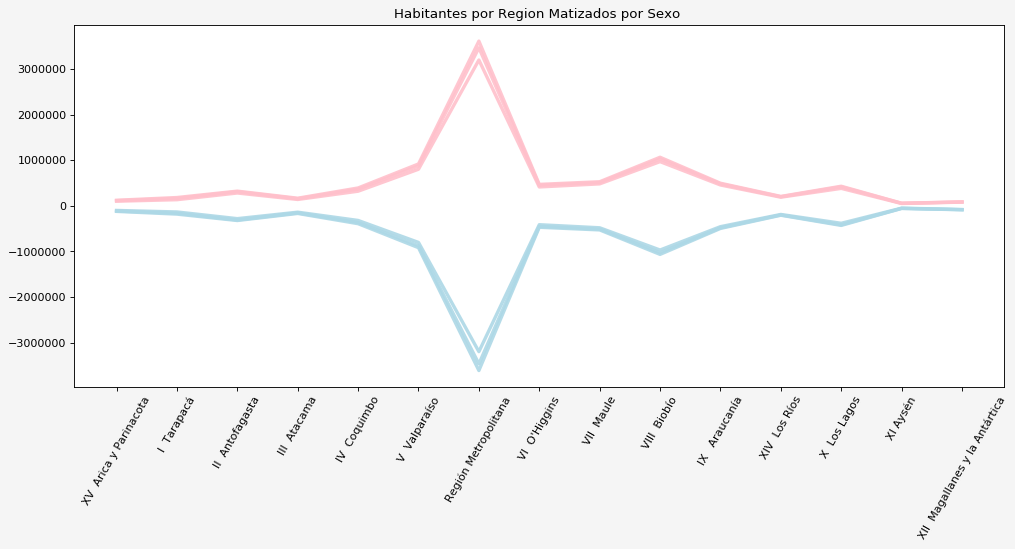

In [0]:
def graph(hor_values, ver_values, ver_values2, g_type=0, 
          show_save=True):
  options = {0: plt.plot, 1: plt.bar }
  # Creación y configuración del gráfico:
  options[g_type](hor_values, ver_values, color ='pink', linewidth=3, alpha=0.9)
  options[g_type](hor_values, -ver_values2, color ='lightblue', linewidth=3, alpha=0.9)

fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
                    edgecolor='k')
plt.tick_params(axis ='x', rotation = 60)
for year in ['a2002', 'a2012', 'a2018']:
  graph(women.index.get_level_values(1), women[year], men[year], 
        g_type=0)
plt.title('Habitantes por Region Matizados por Sexo ')
save_graph('Habitantes por Region Matizados por Sexo ')
plt.show()


## 12. Usando la tabla hecha en (4) haga un heatmap.


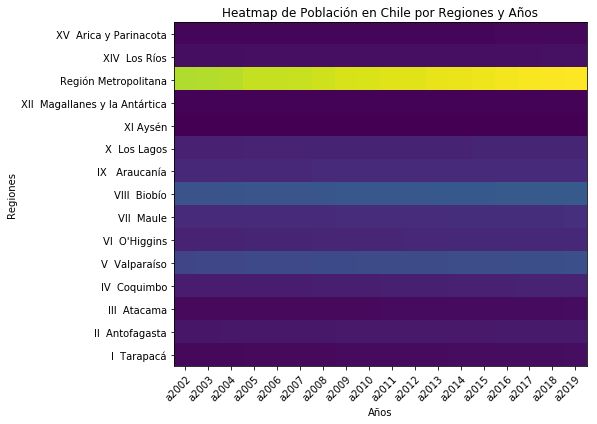

In [0]:
'''(5) NUEVO ARRAY DE FORMA rs[i,j] = r[i] * s[j]'''

fig, ax = plt.subplots()
im = ax.imshow(population_per_region, origin='lower')

# Configuración de los textos de las etiquetas:
ax.set_xticks(np.arange(len(population_per_region.columns.values)))
ax.set_yticks(np.arange(len(population_per_region.index.get_level_values(1))))
ax.set_xticklabels(population_per_region.columns.values)
ax.set_yticklabels(population_per_region.index.get_level_values(1))

# Rotación de las etiquetas y configuración de su alineación:
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Configuración del tamaño y fondo:
fig.set_size_inches(30, 6)
fig.patch.set_facecolor('xkcd:white')

# Configuración del título y del nombre de las variables:
ax.set_title("Heatmap de Población en Chile por Regiones y Años")
plt.xlabel("Años")
plt.ylabel("Regiones")
fig.tight_layout()
save_graph('Heatmap de Población en Chile por Regiones y Años')
plt.show()

In [0]:
# Actualización de variable que impide realizar dos veces la misma operación:
executed_yet = True